EVAL-2
CB.EN.U4CSE20217

PART-B

two tailed test:(ztest)

In [6]:
import numpy as np
import scipy.stats as st
import math
import pandas as pd

2.Carry out a hypothesis test for “mean” of a population. The population standard deviation is
13.46, and the test is for a “mean” different from 60. Given: a sample size of 30, with “sample
mean” 65.10. Consider alpha = 0.05. Demonstrate your solution using either the critical-value or p-value method.

In [3]:
#H0=60(null hypothesis) and Ha!=60(alternative hypothesis)
mu0=60
n=30
xbar=65.10
s=13.46
a=0.05
c_value=st.norm.ppf(1-(a/2))

print("The critical value is ",c_value)
z=(xbar-mu0)/(s/math.sqrt(n))
print("The z value is ",z)

The critical value is  1.959963984540054
The z value is  2.075323211943792


In [43]:
if(z>c_value and z<-(c_value)):
  print("Null hypothesis cannot be rejected")
else:
  print("Rejected")


Rejected


1.Narrative: Gregor Mendel (1822-1884) was an Austrian monk widely recognized as the
founder of the modern field of genetics. Many of his experiments were on varieties of pea
plants. He formulated sets of assumptions about each variety; these were his models. He then
tested the validity of his models by growing the plants and gathering data. You are required to
analyze the data from one such experiment to see if Mendel's model was good. In a particular
variety, each plant has either purple flowers or white. The color in each plant is unaffected by
the colors in other plants.
• Mendel’s hypothesis: plants should bear purple or white flowers at random, in the ratio 3:1.
i.e., For every plant, there is a 75% chance that it will have purple flowers, and a 25% chance
that the flowers will be white, regardless of the colors in all the other plants.
• Mendel’s experiment: Mendel recorded the number of purple and white flowering plants.
Among the 929 plants that he grew, assume (705 + “last 2 digits of your Roll Number”)705+17=722
were purple flowering.
• Hypothesis Test: Carry out a hypothesis test to ascertain Mendel's model.
Specific Requirements:
1. State the Null and Alternative Hypothesis (2).
2. What statistic do you recommend to apply for this case(2)?
3. State the observed statistic(2)
4. Simulate the test statistic under the Null that will help make the decision(5). The number
of simulations should be equal to (2000 - “Last 3 digits of your Roll Number”).2000-217=1783
5. Draw a histogram to depict what the model of random selection predicts about the
statistic.(4). Depict the observed statistic as a red dot on the histogram(1).
6. What is the outcome of your analysis? (1)


1) State the Null and Alternative Hypothesis.
Null Hypothesis :Every plant bearing flowers in purple to white ratio is 3:1.
Alternate hypothesis:Every plant bearing flowers in purple to white ratio is not 3:1.

2) What statistic do you recommend to apply for this case
Statistic recommended : Ratio between purple and white flower.

3.State the observed statistic


In [34]:
import random

flowers = ['purple']*722  #705+17=722
white = ['white']*207     #929-722=207
flowers.extend(white)
random.shuffle(flowers)
flowers[640:650]

['purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'white',
 'purple',
 'purple',
 'purple']

In [15]:
df = pd.DataFrame(flowers,columns=['Flower'])
df.describe()

,Flower
count,929
unique,2
top,purple
freq,722


In [17]:
purple_count = df[df["Flower"]=='purple'].count()
purple_count

Flower    722
dtype: int64

In [18]:
white_count=df[df["Flower"]=='white'].count()
white_count

Flower    207
dtype: int64

In [21]:
total_flowers = df["Flower"].count()
print("Total flower count value is:", total_flowers)

Total flower count value is: 929


In [22]:
observed_proportion = purple_count/total_flowers
observed_proportion

Flower    0.77718
dtype: float64

Test Statistic. Since the model predicts 75% purple-flowering plants, a relevant statistic is the difference between 0.75 and the observed proportion of purple-flowering plants.

In [24]:
observed_statistic = abs(observed_proportion-0.75)
observed_statistic

Flower    0.02718
dtype: float64

In [27]:
model_colors = ['purple','purple','purple','white']
new_sample = np.random.choice(model_colors,total_flowers)
new_sample

array(['white', 'purple', 'purple', 'purple', 'purple', 'purple',
       'purple', 'purple', 'purple', 'purple', 'purple', 'purple',
       'purple', 'purple', 'purple', 'purple', 'purple', 'purple',
       'purple', 'purple', 'purple', 'purple', 'white', 'purple',
       'purple', 'purple', 'purple', 'purple', 'purple', 'purple',
       'purple', 'purple', 'purple', 'purple', 'purple', 'white',
       'purple', 'purple', 'purple', 'white', 'purple', 'purple', 'white',
       'purple', 'purple', 'white', 'purple', 'white', 'purple', 'purple',
       'purple', 'white', 'purple', 'purple', 'purple', 'purple',
       'purple', 'purple', 'purple', 'white', 'purple', 'purple',
       'purple', 'purple', 'purple', 'purple', 'purple', 'white', 'white',
       'purple', 'purple', 'white', 'purple', 'purple', 'purple',
       'purple', 'purple', 'white', 'purple', 'purple', 'purple',
       'purple', 'white', 'white', 'purple', 'white', 'purple', 'white',
       'purple', 'purple', 'purple', 'w

To compare with our observed statistic, we need to know by how much the proportion of purple-flowering plants in this new sample differs from 0.75.

In [37]:
proportion_purple = np.count_nonzero(new_sample == 'purple')/total_flowers
print(abs(proportion_purple - 0.75))

0.018568353067814902


Proportion of purple-flowers in this new sample which differs from 0.75 is 0.01857

In [29]:
import numpy.random as npr
simulations = 1783
for i in range(simulations):
    nosim=npr.binomial(total_flowers,0.75,simulations)
nosim

array([711, 687, 680, ..., 713, 689, 697])

In [31]:
df = pd.DataFrame(nosim , columns =['Count'])

df['sampled_stats']= (df['Count']/total_flowers)
df = df.set_index('Count')
df['Distance from 0.75'] = abs(df['sampled_stats']-0.75)

df.head()

,sampled_stats,Distance from 0.75
Count,,
711,0.765339,0.015339
687,0.739505,0.010495
680,0.731970,0.018030
697,0.750269,0.000269
695,0.748116,0.001884


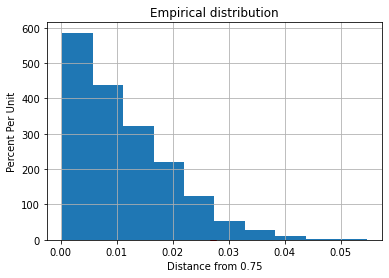

In [42]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df['Distance from 0.75'])
plt.scatter(observed_statistic, 0, color='red', s=30)      #obs_stat= 0.0.579925
plt.title('Empirical distribution')
plt.xlabel('Distance from 0.75')
plt.ylabel('Percent Per Unit')
plt.grid()
plt.show()

CONCLUSION: According to mendel's the observed value of the statistic is 0.02718 which is under 0.04.
The statistic of mendel's data is consistent with the distribution our simulation predicts based on Mendel's model.So it supports null hyposthesis.